In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report, roc_curve, auc
from sklearn.model_selection import cross_val_score, GridSearchCV

In [7]:
data=pd.read_csv(r'C:/Users/MyPC/Downloads/Copper_Set.csv')
data


,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.482421628806,30200854.0,25.0,Won,W,41.0,0.96,1220.0,0000000000000000000000000000000001000777,164141591,20200701.0,591.00
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.086468611529,30200854.0,25.0,Won,W,41.0,0.95,1500.0,0000000000000000000000000000000001000227,164141591,20200701.0,589.00
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.23559356849678,30200854.0,25.0,Won,W,41.0,0.71,1250.0,0000000000000000000000000000000001004216,164141591,20200701.0,619.00
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,0000000000000000000000000000000001001149,164141591,20200701.0,601.00


In [9]:
data_1 = data.copy()

In [10]:
data_1.isna().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [11]:
material_null=data_1['material_ref'].str.startswith("000000")
replace_null=(material_null==True)
data_1['material_ref'][replace_null]=np.NaN
data_1['material_ref'].isnull().sum()

100645

In [12]:
data_1['material_ref'].fillna(data_1['material_ref'].mode()[0],inplace=True)
data_1['material_ref'].isnull().sum()

0

In [13]:
data_1['customer'].fillna(data_1['customer'].mean(), inplace = True)
data_1['country'].fillna(data_1['country'].mean(), inplace = True)
data_1['application'].fillna(data_1['application'].mean(), inplace = True)
data_1['selling_price'].fillna(data_1['selling_price'].mean(), inplace = True)
data_1['delivery date'].fillna(data_1['delivery date'].mean(), inplace = True)

data_1['status'].fillna(data_1['status'].mode()[0], inplace = True)
data_1['item_date'].fillna(data_1['item_date'].mode()[0], inplace = True)

data_1['thickness'].fillna(data_1['thickness'].median(), inplace = True)
data_1.isnull().sum().sum()

2

In [14]:
data_1.dropna(inplace=True)
data_1.isnull().sum()

id               0
item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [15]:
data_1.head(3)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,DX51D+Z,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33


In [16]:
data_1.nunique()

id               181671
item_date           252
quantity tons    181671
customer           1170
country              18
status                9
item type             7
application          31
thickness           594
width              1386
material_ref      11495
product_ref          33
delivery date        29
selling_price      9796
dtype: int64

In [17]:
data_1['quantity tons'] = pd.to_numeric(data_1['quantity tons'], errors='coerce')
data_1['item_date'] = pd.to_datetime(data_1['item_date'])
data_1['delivery date'] = pd.to_datetime(data_1['delivery date'])
#categorical variables
categorical_col=['status','item type','material_ref','product_ref']
#continuous variable
Continues_col = ['quantity tons','customer','country','application','thickness','width','selling_price']

In [18]:
for i in Continues_col:
    print(i,"--",data_1[i].skew())

quantity tons -- 424.6873099371783
customer -- 86.98482927867795
country -- 0.753635242319479
application -- 0.7244124224588578
thickness -- 303.4460810163655
width -- 0.37458349935712015
selling_price -- 301.3864288924798


In [19]:
def outliers_IQR(data_1):
    q1=data_1.quantile(0.25)
    q3=data_1.quantile(0.75)
    IQR=q3-q1
    low_r=(q1-1.5*IQR)
    high_r=(q3+1.5*IQR)
    outliers = data_1[((data_1<(low_r)) | (data_1>(high_r)))]
    return outliers,low_r,high_r
qt_outlier,qt_low,qt_high=outliers_IQR(data_1['quantity tons'])

app_outliers,app_low,app_upper=outliers_IQR(data_1['application'])

thickness_outliers,thickness_low,thickness_upper=outliers_IQR(data_1['thickness'])

width_outliers,width_low,width_upper=outliers_IQR(data_1['width'])

selling_outliers,selling_low,selling_upper=outliers_IQR(data_1['selling_price'])
min(selling_outliers),max(selling_outliers)

(-1160.0, 100001015.0)

In [20]:
data_1['selling_price_out']=data_1['selling_price']
data_1['selling_price_out'] = np.where(data_1['selling_price_out'] >selling_upper, selling_upper,data_1['selling_price_out'])
data_1['selling_price_out'] = np.where(data_1['selling_price_out'] <selling_low, selling_low,data_1['selling_price_out'])
data_1['selling_price_out'].skew()

0.13659230260245983

In [21]:
data_1['quantity tons_log']=np.log(data_1['quantity tons'])

data_1['thickness_log'] = np.log(data_1['thickness'])
data_1['quantity tons_log'].skew(),data_1['thickness_log'].skew()

(-0.06878249133022177, 0.3514353999155478)

In [22]:
Continues_col_out = ['quantity tons_log','customer','country','application','thickness_log','width','selling_price_out']
for i in Continues_col_out:
    print(i,"--",data_1[i].skew())

quantity tons_log -- -0.06878249133022177
customer -- 86.98482927867795
country -- 0.753635242319479
application -- 0.7244124224588578
thickness_log -- 0.3514353999155478
width -- 0.37458349935712015
selling_price_out -- 0.13659230260245983


<Axes: xlabel='quantity tons'>

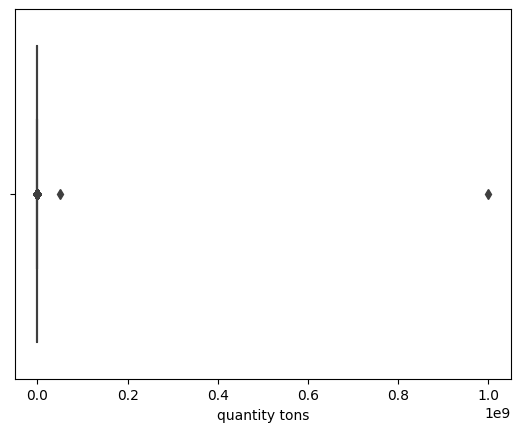

In [23]:
sns.boxplot(x=data_1['quantity tons'])

<Axes: xlabel='quantity tons_log'>

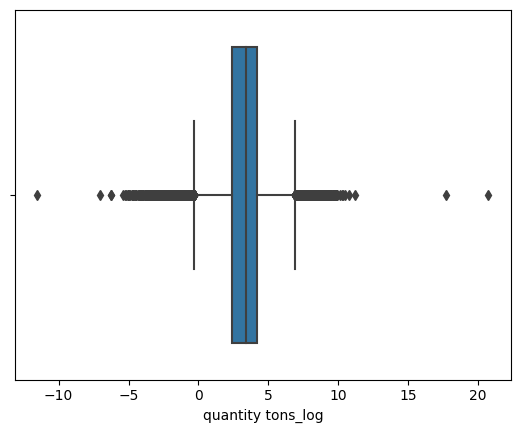

In [24]:
sns.boxplot(x=data_1['quantity tons_log'])

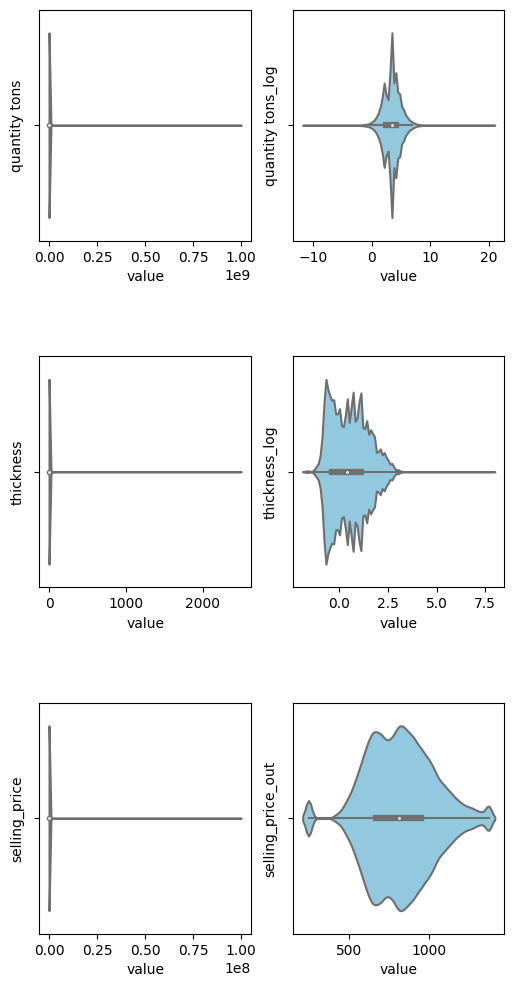

Text(0.5, 0.98, 'VIOLIN PLOT CONTINUOUS VARIABLE')

<Figure size 640x480 with 0 Axes>

In [25]:
cols_plot=['quantity tons','quantity tons_log',
       'thickness','thickness_log','selling_price','selling_price_out']
# Select the features for the violin plot
fig, ax = plt.subplots((len(cols_plot)+1)//2, 2, figsize=(6, 12))
ax=ax.ravel()
for i, feature in enumerate(cols_plot):
    sns.violinplot(data=data_1, x=feature, ax=ax[i], color='skyblue')
    ax[i].set_xlabel('value')
    ax[i].set_ylabel(feature)
#sns.violinplot(data=df, x='selling_price_out', ax=ax[-1], color='skyblue')
# Adjust the spacing between the subplots
plt.subplots_adjust(hspace=0.5)
plt.show()
plt.suptitle("VIOLIN PLOT CONTINUOUS VARIABLE")